# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data/Ads_CTR_Optimisation.csv')

## Implementing UCB

In [3]:
import math
N = 10000
d = 10
ads_selected = []
number_of_selection = [0] * d
sum_of_reward = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if number_of_selection[i] > 0:
            average_reward = sum_of_reward[i] / number_of_selection[i]
            delta_i = math.sqrt(3/2 * (math.log(n+1) / number_of_selection[i]))
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selection[ad] += 1
    reward = dataset.values[n, ad]
    sum_of_reward[ad] += reward
    total_reward += reward

## Visualising the results

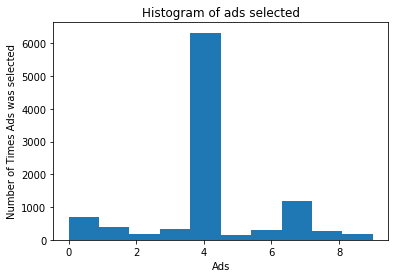

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of Times Ads was selected')
plt.show()